### Linear Classifiers Recap
- Linear classifiers make decisions based on a linear (or more generally affine) combination of features.
- Some we have looked at:
    - Generative: Fisher's LDA, GDA, Naive Bayes
    - Discriminative: Logistic Regression, Perceptron
- A question to ponder upon: What is the "best" linear classifier?

### Vapnik's Principle:

- "When solving a problem of interest, do not solve a more general problem as an intermediate step."
- "Don't solve a harder problem than you have to" 

### Discriminative vs. Generative?
- Generative models require estimation of (conditional) densities or mass functions.
- Often much easier to just determine the "decision boundary."

### Hyperplane: An affine subspace one dimension less than it's ambient space.
- The hyperplanes of a 2-D space are 1-D lines.
- The hyperplanes of a 3-D space are 2-D planes.

- Mathematically, a hyperplane is of the form $\mathbb{H} = \{\mathbf{x} : \mathbf{w}^T\mathbf{x} + b = 0\}$ where $\mathbf{w} \in \mathbb{R}^d$, $b \in \mathbb{R}$ and $d$ is the number of features.

### Point-Plane distance

- Given a hyperplane $\mathbb{H} = \{\mathbf{x} : \mathbf{w}^T\mathbf{x} + b = 0\}$ and a point $\mathbf{z} \not \in H$, we can write $z$ as:

$$z = z_0 + r \cdot \frac{w}{||w||}$$ for a unique $z_0 \in \mathbb{H}$ and $r \in \mathbb{R^+} \cup \mathbb{R^-} (\mathbb{R} \setminus \{0\})$.

- The distance is then given by $|r|$

### Calculating $|r|$

$$\begin{align}\mathbf{w}^T\mathbf{z} + b &=
\mathbf{w}^T\mathbf{z}_0 + \mathbf{w}^T \left(r \cdot \frac{w}{||w||}\right) \\
&= r \frac{\mathbf{w}^T\mathbf{w}}{||\mathbf{w}||}\\
&= r ||\mathbf{w}|| \end{align}$$

Therefore, we have $\boxed{|r| = \frac{|\mathbf{w}^T \mathbf{z} + b|}{||\mathbf{w}||}}$

### Separating Hyperplanes: 
Provide a way of solving 2-class classification problems.

The Idea: divide the vector space $\mathbb{R}^d$ where $d$ is the number of features into 2 "decision regions" with a $\mathbb{R}^{d - 1}$  subspace (a hyperplane).

### Maximum Margin Classifier

- (Functional) Margin: The distance from a separating hyperplane to the closest datapoint of any class.
- Max. Margin Classifiers: separate data by looking for the hyperplane that maximizes the margin.
    - The "best" linear classifier in terms of generalization as misclassification is unlikely with a wide margin between the classes.

In [115]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import svm

def max_margin_classifier(ax, X, Y):
    clf = svm.SVC(kernel='linear')
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    m = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = m * xx - (clf.intercept_[0]) / w[1]

    # plot the parallel lines to the separating hyperplane that pass through the
    # support vectors
    t = clf.support_vectors_[0]
    yy_down = m * xx + (t[1] - m * t[0])
    t = clf.support_vectors_[-1]
    yy_up = m * xx + (t[1] - m * t[0])

    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')

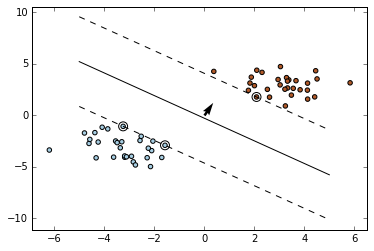

In [256]:
import matplotlib.pyplot as plt

# Create 30 random points
np.random.seed()
X = np.r_[np.random.randn(30, 2) - [3, 3], np.random.randn(30, 2) + [3, 3]]
Y = [0] * 30 + [1] * 30

fig = plt.figure()
ax = fig.add_subplot(111)
_ = max_margin_classifier(ax, X, Y)
plt.quiver(0, 0, 2 * w[0], 2 * w[0]/w[1],
           angles='xy', scale_units='xy', scale=2)
plt.show()

# Note: The separating hyperplane is the line between the two dotted lines. 
# The two dotted lines specify the margin and points on the margin are circled.

### Margin Eqn.

- The margin $\rho$ of a hyperplane is given by $$\rho = \rho(w, b) = \min_{i = 1, ..., n} \frac{|\mathbf{w}^T\mathbf{x}_i + b|}{||\mathbf{w}||}$$ where $\mathbf{x}_i$ is the $i^\text{th}$ datapoint from the training set.

### How do we find the max-margin hyperplane?

- As with other linear classifiers, let the classifier be given by the following form $$f(\mathbf{x}) = sign(\mathbf{w}^T\mathbf{x} + b), sign(t) = \begin{cases} 1 & \text{if } t \geq 0\\ -1 & \text{if } t < 0 \end{cases}$$
- The maximum margin separating hyperplane is then given by the following optimization problem

$$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b}{\text{maximize}}
& & \rho(\mathbf{w}, b)\\
& \text{subject to}
& & y_i(\mathbf{w}^Tx_i + b) > 0
\end{aligned}
\end{equation*}$$

### Canonical Form

- Let $m := \min_{i = 1, ..., n} |\mathbf{w_1}^T\mathbf{x}_i + b_1|$ (Simply renaming $\mathbf{w} as \mathbf{w}_1$ and $b$ as $b_1$.
- Then, scaling $\mathbf{w}_1$ and $b_1$ by $\frac{1}{m}$ keeps the hyperplane unaffected.
- $\mathbf{w_2} = \frac{\mathbf{w_1}}{m}$ and $b_2 = \frac{b_1}{m}$ express the hyperplane in canonical form.

### Restatement of the Opt. Problem

- Using the canonical form, we can rewrite the optimization problem as $$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b}{\text{maximize}} 
& & \frac{|\mathbf{w}^T\mathbf{x}_i + b|}{||\mathbf{w}||}\\
& \text{subject to}
& & y_i(\mathbf{w}^Tx_i + b) \geq 1, \forall i\\
& & & y_i(\mathbf{w}^Tx_i + b) \geq 1 \text{ for some } i
\end{aligned}
\end{equation*}$$

- Simplifying further (try to verify this), we have $$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b}{\text{maximize}} 
& & \frac{1}{2}{||\mathbf{w}||}^2\\
& \text{subject to}
& & y_i(\mathbf{w}^Tx_i + b) \geq 1, \forall i\\
\end{aligned}
\end{equation*}$$

### Linear Separability

- Two classes of data are said to be **linearly separable** if there exists a hyperplane that separates them without any errors.
- So far, we have looked at primarily linearly separable data where a single hyperplane will do for classification.
- We can extend on this notion to a multiclass scenario by considering data to be linearly separable if there exists a set of hyperplanes that can classify the data (again without errors).

### Ideas for dealing with data that isn't linearly separable

- Use "slack" variables that allow for misclassification and penalize misclassification.
- Extend linear classifiers with kernels.

### Optimal Soft-Margin Hyperplane (OSMH)

* Linear Classifier which is the solution to 

$$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b, \mathbf{\xi}}{\text{maximize}} 
& & \frac{1}{2} {||\mathbf{w}||}^2 + \frac{C}{n} \sum_{i = 1}^n \xi_i\\
& \text{subject to}
& & y_i(\mathbf{w}^Tx_i + b) \geq 1 - \xi_i, i = 1, ..., n\\
& & & \xi_i \geq 0, i = 1, ..., n
\end{aligned}
\end{equation*}$$ where we now have a new term that penalizes errors and accounts for the influence of outliers through a constant $C \geq 0$ (0 would lead us back to the hard margin case) and $\mathbf{xi} = [\xi_1, ..., \xi_n]$ are the slack variables.

#### Reasoning behind the optimization conditions: 
- The first condition ensures that the classifier is generally doing well (similar to the previous max-margin optimization constraint except we now allow for some slack).
- The second condition ensures that the slack variables are all non-negative so as to keep the optimization problem from "diverging."

### The OSMH optimization problem

- The OSMH optimization is a convex optimization problem as the objective function is quadratic and the inequality constraints are affine (and hence convex).
- Strong duality holds.

### Lagrangian 

The Lagrangian is given by $$L(\mathbf{w}, b, \mathbf{\xi}, \alpha, \beta) = \frac{1}{2} {||\mathbf{w}||}^2 + \frac{C}{n} - \sum \limits_{i = 1}^n \alpha_i (y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i) - \sum \limits_{i = 1}^n \beta_i \xi_i$$

### Dual Problem 

- So, the Lagrangian Dual is given by the following unconstrained optimization problem
$$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b, \mathbf{\xi}}{\text{minimize}} 
& & L(\mathbf{w}, b, \mathbf{\xi}, \alpha, \beta)
\end{aligned}
\end{equation*}$$

- Thus, the dual problem given by the following optimization 

$$\begin{equation*}
\begin{aligned}
& \underset{\mathbf{w}, b, \mathbf{\xi}}{\text{maximize}} 
& & L_D(\alpha, \beta)\\
& \text{subject to}
& & \alpha \geq 0, \beta \geq 0
\end{aligned} 
\end{equation*}$$

### The Unconstrained Minimization

For a fixed $\alpha$, $\beta$, we can minimize the primal variables as follows:

- $\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i} \alpha_i y_i \mathbf{x}_i = 0, \forall i$
- $\frac{\partial L}{\partial b} = \sum_i \alpha_i y_i = 0, \forall i$
- $\frac{\partial L}{\partial \xi_i} = \frac{C}{n} - \alpha_i - \beta_i = 0, \forall i$

Thus, $\boxed{L_D(\alpha, \beta) = \frac{-1}{2} \sum \limits_{i, j = 1}^n \alpha_i\alpha_jy_iy_j\mathbf{x}_i^T \mathbf{x}_j + \sum_i \alpha_i}$

### The Dual optimization problem revisited
#### (Note the inner product!)

$$\begin{equation*}
\begin{aligned}
& \underset{\alpha, \beta}{\text{maximize}} 
& & \frac{-1}{2} \sum \limits_{i, j = 1}^n \alpha_i\alpha_jy_iy_j<\mathbf{x}_i, \mathbf{x}_j> + \sum_i \alpha_i\\
& \text{subject to}
& & \sum_i \alpha_i y_i = 0\\
& & & \forall i, \alpha_i + \beta_i = \frac{C}{n}\\
& & & \forall i, \alpha_i \geq 0,\beta_i \geq 0
\end{aligned} 
\end{equation*}$$


### Eliminating Constraints

By eliminating $\beta$, we can write the dual optimization as the following QP

$$\begin{equation*}
\begin{aligned}
& \underset{\alpha}{\text{maximize}} 
& & \frac{-1}{2} \sum \limits_{i, j = 1}^n \alpha_i\alpha_jy_iy_j<\mathbf{x}_i, \mathbf{x}_j> + \sum_i \alpha_i\\
& \text{subject to}
& & \sum_i \alpha_i y_i = 0\\
& & & \forall i, 0 \leq \alpha_i \leq \frac{C}{n}
\end{aligned} 
\end{equation*}$$

### Observations 

- Let $\mathbf{w}^*, b^*$ and $\mathbf{\xi}^*$ be the primal optimal solutions and $\alpha^*$ and $\beta^*$ be the dual optimal solutions.

- From the KKT conditions, we have $\mathbf{w}^* = \sum \limits_{i = 1}^n \alpha_i^* y_i \mathbf{x}_i$. So, the optimal normal vector to the hyperplane is a linear combination of datapoints!


- From the complimentary slackness KKT condition, $\alpha_i^* (1 - \xi_i^* - y_i(\mathbf{w}^*^T\mathbf{x}_i + b^*)) = 0$. 

- If $\mathbf{x}_i$ satisfies $y_i(\mathbf{w}^*^T\mathbf{x}_i + b^*) = 1 - \xi_i^*$, we call $\mathbf{x}_i$ a support vector. In other words, if $\mathbf{x}_i$ is not a support vector, $\alpha_i^* = 0$. 

- The above means that $\mathbf{w}^*$ depends only on the support vectors!

In [ ]:
### Geometric Interpretation

